In [ ]:
from sklearn.metrics import mean_absolute_error, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential, load_model
from keras.layers import Dropout, Dense
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from keras import regularizers
from google.colab import files
from sklearn import ensemble
import seaborn as sns
import pandas as pd
import numpy as np
import io

In [ ]:
# uploaded = files.upload()
# wine_df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

In [ ]:
wine_df = pd.read_csv('winequality-red.csv')

In [ ]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Histogram(x=wine_df['quality'])])
fig.update_traces(marker_color='brown')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()

In [ ]:
#rob_scaler = RobustScaler()
ss = StandardScaler()
wine_scaled_df = pd.DataFrame(ss.fit_transform(wine_df.iloc[:, :-1]), columns=wine_df.columns[:-1])
wine_scaled_df['quality'] = wine_df['quality']
wine_scaled_df = wine_scaled_df[(np.abs(wine_scaled_df.iloc[:, :-1]) < 3).all(1)]
wine_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


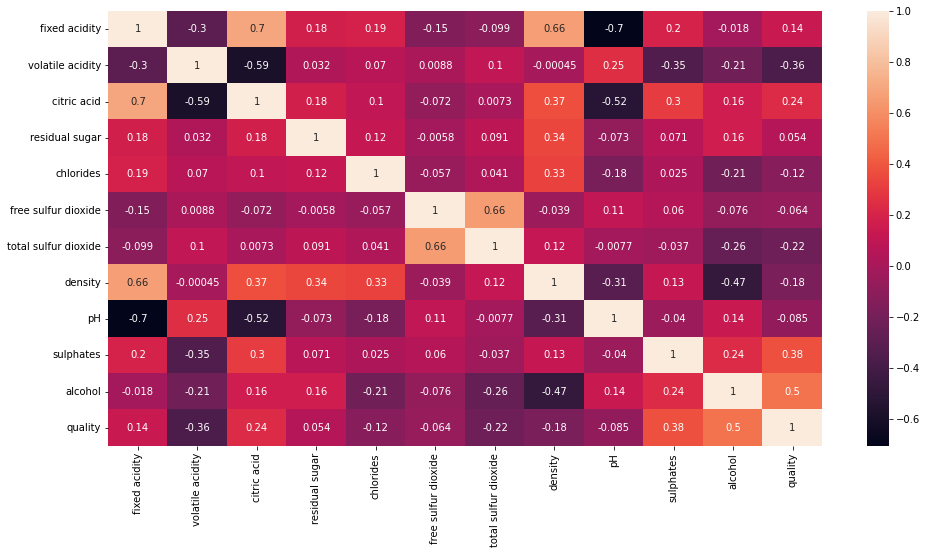

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(wine_scaled_df.corr(), annot=True)

<Figure size 1152x432 with 0 Axes>

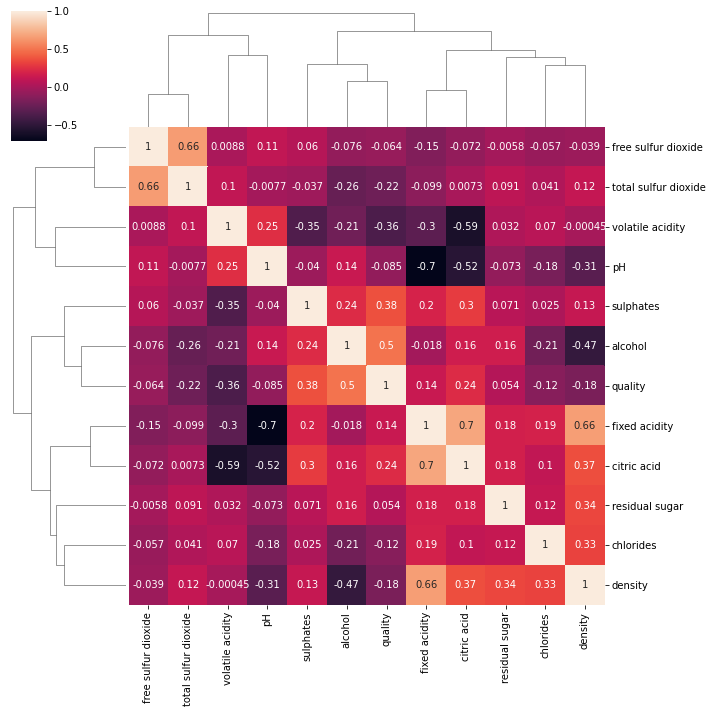

In [ ]:
plt.figure(figsize=(16, 6))
sns.clustermap(wine_scaled_df.corr(), annot=True)

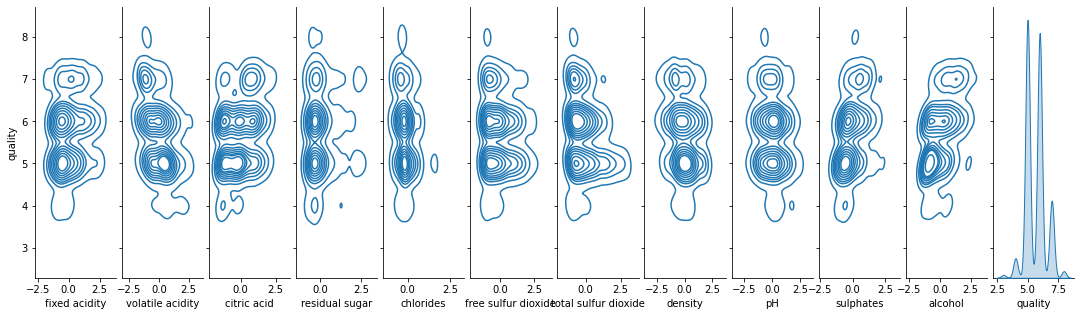

In [ ]:
fig = sns.pairplot(wine_scaled_df, kind='kde',
                   y_vars=["quality"])
fig.fig.set_size_inches(15, 5)

In [ ]:
reg = LinearRegression()
labels = wine_scaled_df['quality']
train = wine_scaled_df.drop(['quality'], axis=1)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(train , labels , test_size = 0.10,random_state =2)

In [ ]:
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.3162627500979698

In [ ]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
                                         learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [ ]:
clf.score(x_test,y_test)


0.3926130307265745

In [ ]:
y_pred = reg.predict(x_test)


In [ ]:
test = x_test.copy()
test['quality'] = y_test
test['predictions'] = y_pred
test['predictions'] = test['predictions'].apply(lambda x: round(x))
test.reset_index(inplace = True)
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
0,277,1.827215,-1.943091,1.227401,1.036685,0.351398,-1.135608,-0.713631,1.512299,-0.201591,1.840330,-0.303175,6,6
1,1059,0.333436,-0.267148,1.330102,1.036685,0.287636,-1.231239,-1.108948,-0.469952,-0.655141,-0.402167,1.574170,7,6
2,1058,0.907967,0.012176,1.535504,-0.098479,0.117607,1.350792,0.168229,0.187265,-0.784726,0.601055,1.104833,7,6
3,675,0.563248,-0.658202,0.611196,-0.240375,-0.498751,-0.370562,-0.470360,0.876283,-0.331177,-0.048089,-0.209308,5,6
4,353,2.976276,0.012176,2.665214,1.604268,0.691457,0.681377,0.928453,2.678329,-0.849519,0.660068,2.418975,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1062,-0.183641,-0.825796,0.867948,-0.453218,0.223875,-0.944346,-0.956903,-0.607756,-0.072005,-0.107102,0.917099,6,6
142,779,-0.700719,-0.043689,-1.237421,0.043416,-0.243707,0.490115,1.384587,0.372770,1.223850,-0.343154,-0.584777,5,5
143,1167,-0.068735,-1.105120,0.611196,-0.027532,-0.286214,1.255161,0.046593,-0.777360,0.057580,1.309212,1.855771,7,7
144,1445,-0.528360,1.436727,-0.415813,1.888059,0.138860,0.298854,1.567041,0.203165,-0.979104,-0.815259,-0.772512,6,5


In [ ]:
mae = np.round(mean_absolute_error(test['quality'], test['predictions']), 3)
mae

0.466

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=test.index.to_list(),
        y=test['quality'],
        mode='lines',
        name='quality',
         line_color='#bf360c'
    ))

fig.add_trace(
    go.Scatter(
        x=test.index.to_list(),
        y=test['predictions'],
        mode='lines',
        name='prediction',
        line_color='#bf9000'
    ))

fig.update_layout(paper_bgcolor='rgb(27,0,0)',
                  plot_bgcolor ='rgb(27,0,0)',
                  yaxis=dict(color="#ffffff"),
                  xaxis=dict(color="#ffffff"),
                  legend_font_color='white')
fig.show()

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(train, labels, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1020, 11) (219, 11) (219, 11) (1020,) (219,) (219,)


In [ ]:
input_size = 11
hidden_layer_size = 50
dropout = 0.3
learning_rate = 0.00001

In [ ]:
model = Sequential([

Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate), input_shape=(input_size,)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(1, kernel_regularizer=regularizers.l2(learning_rate)),
])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
# fit model
hist = model.fit(X_train, Y_train,
batch_size= 32, epochs=100,
validation_data=(X_val, Y_val), callbacks=[es, mc])

Epoch 1/100
27/32 [========================>.....] - ETA: 0s - loss: 18.2216 - mae: 3.8029
Epoch 1: val_loss improved from inf to 4.40030, saving model to best_model.h5
32/32 [==============================] - 3s 19ms/step - loss: 16.3943 - mae: 3.5406 - val_loss: 4.4003 - val_mae: 1.8968
Epoch 2/100
18/32 [===============>..............] - ETA: 0s - loss: 7.2340 - mae: 2.2582
Epoch 2: val_loss did not improve from 4.40030
32/32 [==============================] - 0s 4ms/step - loss: 7.3069 - mae: 2.2565 - val_loss: 6.0634 - val_mae: 2.3349
Epoch 3/100
30/32 [===========================>..] - ETA: 0s - loss: 5.4585 - mae: 1.8885
Epoch 3: val_loss did not improve from 4.40030
32/32 [==============================] - 0s 5ms/step - loss: 5.4344 - mae: 1.8819 - val_loss: 7.4212 - val_mae: 2.6180
Epoch 4/100
30/32 [===========================>..] - ETA: 0s - loss: 4.5251 - mae: 1.7100
Epoch 4: val_loss did not improve from 4.40030
32/32 [==============================] - 0s 5ms/step - loss: 

In [ ]:
model = load_model('best_model.h5')

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 1s 4ms/step - loss: 0.4385 - mae: 0.5230


0.5230283737182617

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 6ms/step


In [ ]:
test = X_test.copy()
test['quality'] = Y_test
test['predictions'] = y_pred
test['predictions'] = test['predictions'].apply(lambda x: round(x))
test.reset_index(inplace = True)
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
0,1256,-0.470907,0.347364,-0.261762,-0.524166,-0.116184,2.593992,0.411500,-0.931064,-1.367861,-1.405390,-1.147981,5,5
1,1557,-0.987984,1.827781,-1.288771,-0.098479,-0.541259,-0.083669,-0.713631,-0.252646,1.483021,-0.343154,0.541630,6,5
2,1569,-1.217796,-0.099554,-0.672566,-0.453218,-0.668781,-0.083669,-0.379133,-1.476978,1.094265,-0.520193,1.010966,6,6
3,514,1.252685,-0.099554,1.894957,-0.098479,0.415159,-0.944346,-0.956903,0.293268,-1.432654,0.010924,1.292568,7,6
4,700,1.310138,2.749549,0.816598,0.256260,-0.243707,0.968269,1.262952,0.876283,-1.497447,-0.520193,-0.303175,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,972,1.022873,-0.825796,1.176051,-0.098479,0.351398,-0.944346,-1.017721,-0.167844,-0.590348,-0.048089,1.104833,7,6
215,857,-0.068735,-1.496173,0.354443,-0.027532,-0.307468,0.011961,0.016184,-0.427551,0.575922,0.719081,0.823232,7,6
216,1459,-0.241094,-1.831362,0.405794,-0.595114,-0.711289,-0.848716,-0.956903,-1.148370,0.057580,0.837107,1.386435,7,6
217,1531,-1.275249,0.989809,-0.877968,0.185312,-0.137438,-0.274931,-0.561586,-0.231446,1.871778,0.010924,-0.209308,5,5


In [ ]:
mae = np.round(mean_absolute_error(test['quality'], test['predictions']), 3)
mae

0.438

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=test.index.to_list(),
        y=test['quality'],
        mode='lines',
        name='quality',
         line_color='#bf360c'
    ))

fig.add_trace(
    go.Scatter(
        x=test.index.to_list(),
        y=test['predictions'],
        mode='lines',
        name='prediction',
        line_color='#bf9000'
    ))

fig.update_layout(paper_bgcolor='rgb(27,0,0)',
                  plot_bgcolor ='rgb(27,0,0)',
                  yaxis=dict(color="#ffffff"),
                  xaxis=dict(color="#ffffff"),
                  legend_font_color='white')
fig.show()

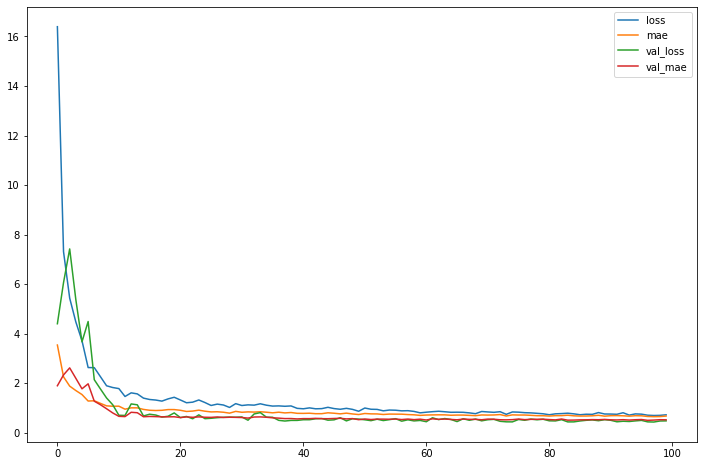

In [ ]:
loss_df = pd.DataFrame(hist.history)
loss_df.plot(figsize=(12,8))

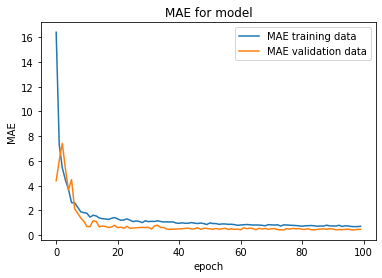

In [ ]:
plt.plot(hist.history['loss'], label='MAE training data')
plt.plot(hist.history['val_loss'], label='MAE validation data')
plt.legend()
plt.title('MAE for model')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.show()

In [ ]:
input_size = 11
hidden_layer_size = 32

In [ ]:
model = Sequential([

Dense(hidden_layer_size, activation='relu', input_shape=(input_size,)),
Dense(hidden_layer_size, activation='relu'),
Dense(hidden_layer_size, activation='relu'),
Dense(1, )
])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 18ms/step - loss: 22.2119 - mae: 4.5477 - val_loss: 11.3809 - val_mae: 3.1417
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 5.8285 - mae: 2.0614 - val_loss: 2.7404 - val_mae: 1.3349
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 2.3843 - mae: 1.2602 - val_loss: 1.8958 - val_mae: 1.0705
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 1.7305 - mae: 1.0612 - val_loss: 1.4614 - val_mae: 0.9210
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 1.3921 - mae: 0.9479 - val_loss: 1.1885 - val_mae: 0.8225
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1765 - mae: 0.8671 - val_loss: 1.0009 - val_mae: 0.7638
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9969 - mae: 0.7925 - val_loss: 0.8593 - val_mae: 0.7210
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8720 

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.4464 - mae: 0.4984


0.4984254240989685

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
test = X_test.copy()
test['quality'] = Y_test
test['predictions'] = y_pred
test['predictions'] = test['predictions'].apply(lambda x: round(x))
test.reset_index(inplace = True)
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
0,1256,-0.470907,0.347364,-0.261762,-0.524166,-0.116184,2.593992,0.411500,-0.931064,-1.367861,-1.405390,-1.147981,5,5
1,1557,-0.987984,1.827781,-1.288771,-0.098479,-0.541259,-0.083669,-0.713631,-0.252646,1.483021,-0.343154,0.541630,6,6
2,1569,-1.217796,-0.099554,-0.672566,-0.453218,-0.668781,-0.083669,-0.379133,-1.476978,1.094265,-0.520193,1.010966,6,5
3,514,1.252685,-0.099554,1.894957,-0.098479,0.415159,-0.944346,-0.956903,0.293268,-1.432654,0.010924,1.292568,7,6
4,700,1.310138,2.749549,0.816598,0.256260,-0.243707,0.968269,1.262952,0.876283,-1.497447,-0.520193,-0.303175,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,972,1.022873,-0.825796,1.176051,-0.098479,0.351398,-0.944346,-1.017721,-0.167844,-0.590348,-0.048089,1.104833,7,7
215,857,-0.068735,-1.496173,0.354443,-0.027532,-0.307468,0.011961,0.016184,-0.427551,0.575922,0.719081,0.823232,7,6
216,1459,-0.241094,-1.831362,0.405794,-0.595114,-0.711289,-0.848716,-0.956903,-1.148370,0.057580,0.837107,1.386435,7,7
217,1531,-1.275249,0.989809,-0.877968,0.185312,-0.137438,-0.274931,-0.561586,-0.231446,1.871778,0.010924,-0.209308,5,5


In [ ]:
mae = np.round(mean_absolute_error(test['quality'], test['predictions']), 3)
mae

0.438

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=test.index.to_list(),
        y=test['quality'],
        mode='lines',
        name='quality'
    ))

fig.add_trace(
    go.Scatter(
        x=test.index.to_list(),
        y=test['predictions'],
        mode='lines',
        name='prediction'
    ))
fig.show()

In [ ]:
wine_scaled_df['quality'] = np.where(wine_scaled_df['quality']>6,1,0)
wine_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,0
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,0


In [ ]:
labels = wine_scaled_df['quality']
train = wine_scaled_df.drop(['quality'], axis=1)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(train, labels, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
input_size = 11
hidden_layer_size = 50
dropout = 0.3
learning_rate = 0.00001

In [ ]:
model = Sequential([

Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate), input_shape=(input_size,)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(hidden_layer_size, activation='relu', kernel_regularizer=regularizers.l2(learning_rate)),
Dropout(dropout),
Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(learning_rate)),
])

In [ ]:
model.compile(optimizer='adam',

loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
hist = model.fit(X_train, Y_train,
batch_size= 32, epochs=100,
validation_data=(X_val, Y_val), callbacks=[es, mc])

Epoch 1/100
21/32 [==================>...........] - ETA: 0s - loss: 0.6510 - accuracy: 0.7500
Epoch 1: val_accuracy improved from -inf to 0.83105, saving model to best_model.h5
32/32 [==============================] - 2s 19ms/step - loss: 0.5955 - accuracy: 0.7961 - val_loss: 0.4685 - val_accuracy: 0.8311
Epoch 2/100
32/32 [==============================] - ETA: 0s - loss: 0.4400 - accuracy: 0.8706
Epoch 2: val_accuracy did not improve from 0.83105
32/32 [==============================] - 0s 7ms/step - loss: 0.4400 - accuracy: 0.8706 - val_loss: 0.4535 - val_accuracy: 0.8311
Epoch 3/100
32/32 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.8706
Epoch 3: val_accuracy did not improve from 0.83105
32/32 [==============================] - 0s 7ms/step - loss: 0.3767 - accuracy: 0.8706 - val_loss: 0.4004 - val_accuracy: 0.8311
Epoch 4/100
25/32 [======================>.......] - ETA: 0s - loss: 0.3485 - accuracy: 0.8662
Epoch 4: val_accuracy did not improve from 0.83

In [ ]:
model = load_model('best_model.h5')

In [ ]:
predict_x=model.predict(X_test)

predictions = (predict_x > 0.3).astype("int32")

7/7 [==============================] - 0s 2ms/step


In [ ]:
model.evaluate(X_val, Y_val)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 0.9087


0.9086757898330688

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8630


0.8630136847496033

In [ ]:
confusion_matrix(Y_test, predictions)

array([[143,  44],
       [  6,  26]])

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       187
           1       0.37      0.81      0.51        32

    accuracy                           0.77       219
   macro avg       0.67      0.79      0.68       219
weighted avg       0.87      0.77      0.80       219



In [ ]:
confusion_matrix(Y_test, Y_test)

array([[187,   0],
       [  0,  32]])

In [ ]:
test = X_test.copy()
test['quality'] = Y_test
test['predictions'] = predictions
test.reset_index(inplace = True)
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predictions
0,799,0.620701,-0.155419,0.354443,0.752894,-0.116184,-1.039977,-0.987312,1.035287,-0.136798,-0.815259,0.260028,0,0
1,212,1.884668,-0.490607,1.894957,-0.311323,-0.605020,-1.039977,-0.956903,0.664277,-0.655141,0.069937,-0.209308,0,0
2,435,2.286840,-0.769931,1.843607,-0.169427,0.075099,-0.944346,-0.865676,1.936310,-0.979104,-0.992298,-0.866379,0,0
3,419,-0.873078,1.352930,-1.391472,-0.524166,-0.456244,1.733315,0.168229,0.452272,2.001364,0.128950,-0.490910,0,0
4,434,1.195232,-0.658202,1.432803,0.469103,-0.243707,0.585746,0.229047,1.512299,-1.043897,1.368225,-0.490910,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,0,0
215,766,0.275983,0.347364,-0.467164,0.256260,0.032592,-0.370562,0.837226,0.335669,-1.108690,-0.697233,-0.960246,0,0
216,760,0.390889,0.291499,-0.107711,0.185312,-0.264960,-0.657454,1.749495,0.552974,-0.525555,-0.520193,-0.678644,0,0
217,1378,-0.643266,-0.434742,-0.621215,-0.382271,-0.201199,-0.561823,-0.561586,-0.348049,-0.136798,-0.874272,-0.490910,0,0


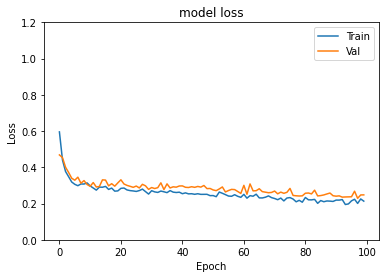

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

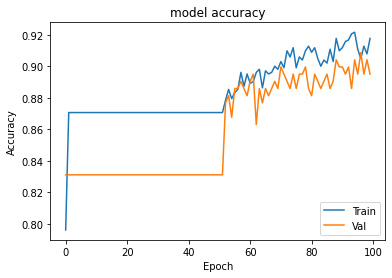

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()